# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


# 0. Carga de librerías

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scipy.stats
from scipy.stats import chi2_contingency
from scipy.stats import uniform


# Modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV


#Metricas
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, balanced_accuracy_score, roc_auc_score, plot_roc_curve

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [20]:
pd.options.display.max_columns = 50

In [33]:
df = pd.read_csv('weatherAUS.csv')

# 1. Análisis exploratorio inicial

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [5]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Variables numéricas

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


De esta primera inspección de las variables numéricas se observa:

* Grandes variaciones de escala entre las variables, varios órdenes de magnitud.
* Mismas variables medidas en diferentes momentos del tiempo --> Ver deltas
* Diferencias en variabilidad de los datos
* Diferencia en concentraciones de los datos

## Variables categóricas

In [7]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2014-07-02,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


De esta primera inspección de las variables categóricas se observa:

* Diferencias de valores únicos
* Diferencias de concentración/balance de las categorías

## Análisis de nulos

In [8]:
# Porcentaje de nulos por columna
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Se observa que hay columnas con nulos, **antes de tomar decisiones** sobre qué hacer con esos registros, se realizará un **análisis más profundo** de los datos. 

Para el caso de registros con la variable **RainTomorrow nula** se toma la decisión de **eliminar esos registros** dado que se trata de la variable objetivo, y por lo tanto imputarle un valor, sea cual sea la técnica, implica el riesgo de estar agregando ruido a la señar que queremos predecir. 

In [11]:
len(df)

145460

In [4]:
df = df[df.RainTomorrow.isna() == False].copy()

In [5]:
len(df)

142193

In [129]:
# No hay registros duplicados
df.duplicated().sum()

0

## Análisis de variable objetivo

In [15]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [34]:
31877/(31877+110316)

0.22418121848473554

In [6]:
df['target'] = df.RainTomorrow.apply(lambda x: 1 if x == 'Yes' else 0)

Se oberserva que las clases no están balanceadas, se tiene mayor cantidad de observaciones donde no llueve al día siguiente. 

## Primeras definiciones sobre las columnas

Con este primer vistazo a los datos se puede definir:

**Variable objetivo**: RainTomorrow - Tipo binario, predice si lloverá o no al día siguiente.

El resto son variables predictoras, donde podemos clasificarlas como:

**Variables numéricas**

* MinTemp
* MaxTemp
* RainFall
* Evaporation
* Sunshine
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm
* Pressure9am
* Pressure3pm
* Cloud9am
* Cloud3pm
* Temp9am 
* Temp3pm

**Variables categóricas**
* Location
* WindDir9am
* WindDir3pm
* RainToday

**Variable temporal**
* Date

Para hacer uso de la variable fecha se agrupara por estaciones del año en Australia, según lo indicado en https://www.australia.com/en/facts-and-planning/weather-in-australia.html

Se toma esta decisión previa al análisis de los datos ya que se entiende que las estaciones del año están caracterizadas por predominar diferentes eventos meteorológicos.

In [7]:
# Cambio de tipo de dato
df['Date'] = pd.to_datetime(df.Date)
# Tomamos únicamente el mes, para definir estaciones
df['month'] = pd.DatetimeIndex(df.Date).month.values

In [8]:
df['mes'] = pd.DatetimeIndex(pd.to_datetime(df.Date)).month

In [9]:
estaciones = {12:'v', 1:'v', 2:'v',
             3:'o',4:'o',5:'o',
             6:'i',7:'i',8:'i',
             9:'p',10:'p',11:'p'}

In [10]:
df['estacion'] = df.mes.map(estaciones)

In [11]:
df.drop(columns=['mes','month','Date'],inplace=True)

# 2. Esquema de validación de resultados

Se separan los datos en train y test previo a realizar un análisis profundo que devenga en modificaciones a los mismos, de manera que todo el proceso de trabajo y construcción de modelo se asemeje más a lo que pasaría en un entorno de producción.

En primera instancia se intenta distribuir por: 

* **RainTomorrow:** Es la variable target, es deseable que queden registros en proporciones equivalentes.
* **Location:** Australia es un país muy grande y es posible que en diferentes ciudades predominen diferentes climas. Por este motivo se decide también balancear por esta clase, de lo contrario poodría darse por azar que predominen registros de ciudades poco lluviosas en el train y el modelo no tendría forma de aprender de los datos.
* **Estación:** Por los mismos motivos explicados previamente, hay estaciones del año que son más lluviosas que otras y por lo tanto es importante tener los datos balanceados para evitar que, por azar, haya concentraciones de registros de estaciones lluviosas/secas en alguno de los dos conjuntos de datos. 

Pero sklearn genera un error porque quedan grupos con un único registro, lo que hace imposible la división propuesta. (Ejemplo-> Location=='Katherine' para Invierno tiene un único día de lluvia en la bbdd.

``dftrain, dftest = train_test_split(df,
                                   test_size=0.2,
                                   random_state= 12,
                                  stratify = df[['RainTomorrow','estacion','Location']])``

``
ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
``

In [42]:
df[df.Location=='Katherine'].groupby(by=['Location','estacion','RainTomorrow']).count()

Date  MinTemp  MaxTemp  Rainfall  \
Location  estacion RainTomorrow                                     
Katherine i        No             389      386      389       388   
                   Yes              1        1        1         1   
          o        No             399      384      388       399   
                   Yes             58       53       57        55   
          p        No             322      313      315       321   
                   Yes             40       39       40        39   
          v        No             184      180      183       182   
                   Yes            166      159      164       160   

                                 Evaporation  Sunshine  WindGustDir  \
Location  estacion RainTomorrow                                       
Katherine i        No                    386         0          384   
                   Yes                     1         0            1   
          o        No                    382         0          391   
                   Yes                    45         0           56   
          p        No                    310         0          315   
                   Yes                    37         0           40   
          v        No                    172         0          183   
                   Yes                   140         0          161   

                                 WindGustSpeed  WindDir9am  WindDir3pm  \
Location  estacion RainTomorrow                                          
Katherine i        No                      384         387         388   
                   Yes                       1           1           1   
          o        No                      391         389         396   
                   Yes                      56          57          58   
          p        No                      315         314         318   
                   Yes                      40          37          39   
          v        No                      183         173         178   
                   Yes                     161         161         163   

                                 WindSpeed9am  WindSpeed3pm  Humidity9am  \
Location  estacion RainTomorrow                                            
Katherine i        No                     389           388          357   
                   Yes                      1             1            1   
          o        No                     398           396          379   
                   Yes                     58            58           55   
          p        No                     322           321          314   
                   Yes                     40            40           39   
          v        No                     184           184          179   
                   Yes                    166           165          158   

                                 Humidity3pm  Pressure9am  Pressure3pm  \
Location  estacion RainTomorrow                                          
Katherine i        No                    158          389          388   
                   Yes                     0            1            1   
          o        No                    213          398          396   
                   Yes                    25           58           58   
          p        No                    154          322          322   
                   Yes                    20           40           40   
          v        No                     93          184          184   
                   Yes                    74          166          165   

                                 Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
Location  estacion RainTomorrow                                         
Katherine i        No                 386       235      386      235   
                   Yes                  1         0        1        0   
          o        No                 387       241      386      241   
                   Yes 

Para resolver si conservar Location o Estación, realizamos un test de Chi Cuadrado para evaluar cuál de las dos variables discrimina mejor. 

In [56]:
estaciones = np.array(pd.crosstab(columns=df.RainTomorrow,index=df.estacion,margins=False))
locations = np.array(pd.crosstab(columns=df.RainTomorrow,index=df.Location,margins=False))

In [58]:
chi2_est, p_est, dof_est, ex_est = chi2_contingency(estaciones, correction=False)
chi2_loc, p_loc, dof_loc, ex_loc = chi2_contingency(locations, correction=False)

In [61]:
(chi2_est,chi2_loc),(p_est,p_loc)

((404.82791038433845, 3544.7901812833), (1.9924173993476107e-87, 0.0))

Ambos test de independencia dan un **p_value** muy bajo, sin embargo, revisando el valor del estadístico calculado, las **localidades** generan un valor bastante más extremo, serían en principio "más independientes", por lo tanto **se prioriza el split balanceado por estación** del año. 

In [13]:
dftrain, dftest = train_test_split(df,
                                   test_size=0.2,
                                   random_state= 12,
                                  stratify = df[['RainTomorrow','estacion']])

# 3. Limpieza y preparación de datos / ingeniería de features

## Análisis univariante de variables predictoras

### Variables compuestas (fecha--> Estación)

El tratamiento de la variable fecha fue explicado previamente. Estudiamos la distribución de la estación del año.

In [137]:
dftrain.estacion.value_counts().sort_index()

i    28744
o    29917
p    27688
v    27405
Name: estacion, dtype: int64

Puede observarse en el set de entrenamiento que los registros están distribuidos de manera pareja.

### Variables numéricas

#### Creación de variables delta

Se crean las variables "delta" o de "amplitud" para aquellas variables que miden lo mismo, pero en diferentes momentos del tiempo.

In [ ]:
dHumidity
dPressure
dCloud    
dWindSpeed
dTemp
ampTermica

In [ ]:
dftrain.loc[:,['dHumidity']]  = dftrain.Humidity3pm  - dftrain.Humidity9am
dftrain.loc[:,['dPressure']]  = dftrain.Pressure3pm  - dftrain.Pressure9am
dftrain.loc[:,['dCloud']]     = dftrain.Cloud3pm     - dftrain.Cloud9am
dftrain.loc[:,['dWindSpeed']] = dftrain.WindSpeed3pm - dftrain.WindSpeed9am
dftrain.loc[:,['dTemp']]      = dftrain.Temp3pm      - dftrain.Temp9am
dftrain.loc[:,['ampTermica']] = dftrain.MaxTemp      - dftrain.MinTemp

dftest.loc[:,['dHumidity']]  = dftest.Humidity3pm  - dftest.Humidity9am
dftest.loc[:,['dPressure']]  = dftest.Pressure3pm  - dftest.Pressure9am
dftest.loc[:,['dCloud']]     = dftest.Cloud3pm     - dftest.Cloud9am
dftest.loc[:,['dWindSpeed']] = dftest.WindSpeed3pm - dftest.WindSpeed9am
dftest.loc[:,['dTemp']]      = dftest.Temp3pm      - dftest.Temp9am
dftest.loc[:,['ampTermica']] = dftest.MaxTemp      - dftest.MinTemp

#### Análisis gráfico

Se realiza un primer análisis gráfico de las variables de manera univariada. Si alguna requiriera de acciones concretas particulares, se la trata en un subapartado.

**Histogramas**

Para construir el **histograma** de una variable numérica, seaborn calcula una discretización de la misma y cuenta la cantidad de registros que caen dentro del intervalo delimitado por cada intervalo, la altura de la barra está asociado a ese conteo.
Se grafica el histograma diferenciando entre evento/no-evento para comparar las distribuciones. 

**Box-plot**

El **boxplot** presenta de manera gráfica algunos de los principales estadísticos que caracterizan una distribución: Q25, Mediana (Q50) y Q75, que construyen el cuerpo del gráfico. También están los "bigotes" o whiskers que se calculan como Q75(Q25) + (-) 1.5 IQR, donde IQR es el rango intercuartílico.

Para nuestro caso, difereciamos tanto por llueve/no-llueve y por las cuatro estaciones del año en Australia. 

In [15]:
varnum = [x for x in dftrain.select_dtypes(include=np.number).columns]

In [17]:
varnum.remove('target')

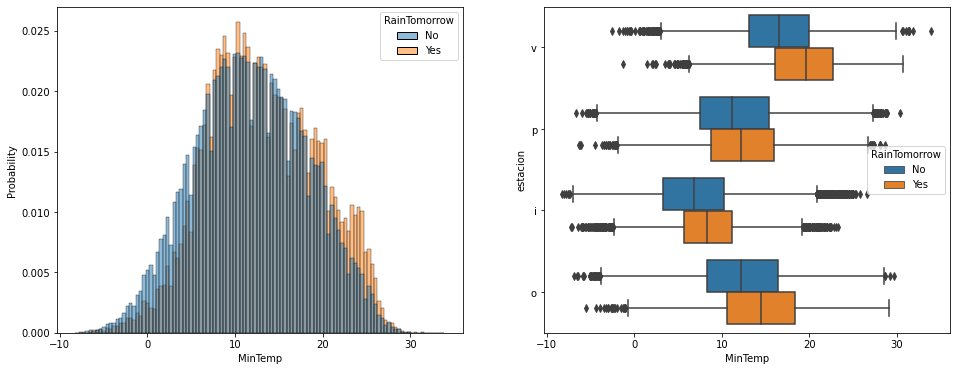

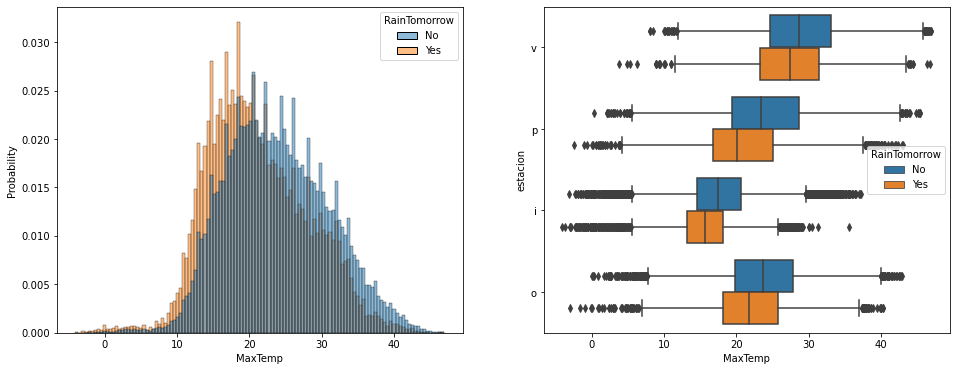

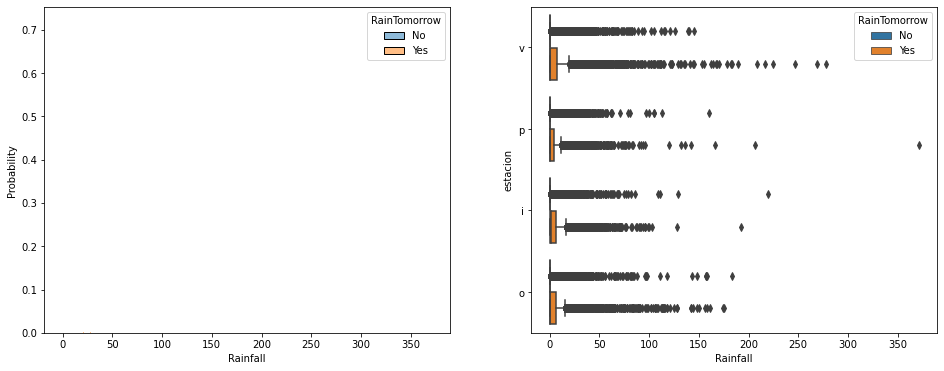

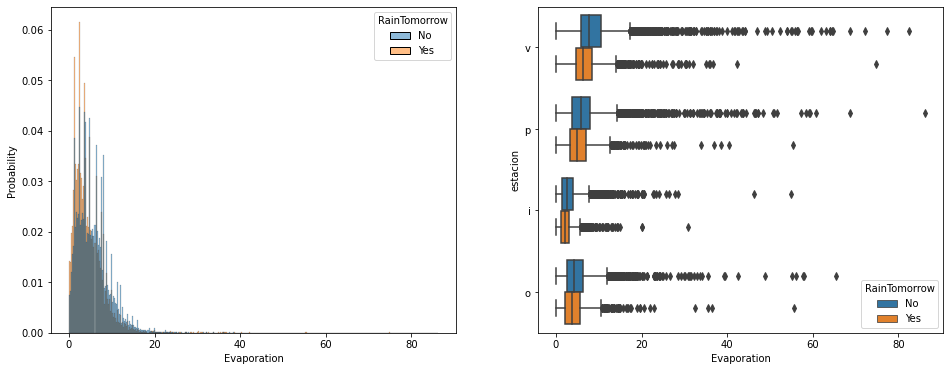

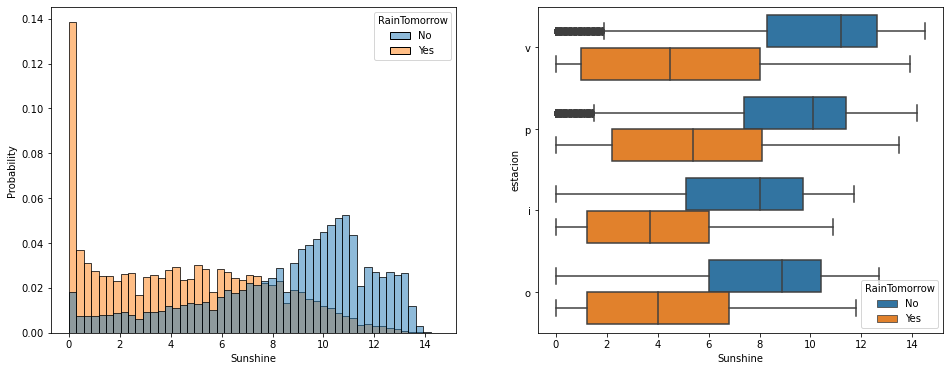

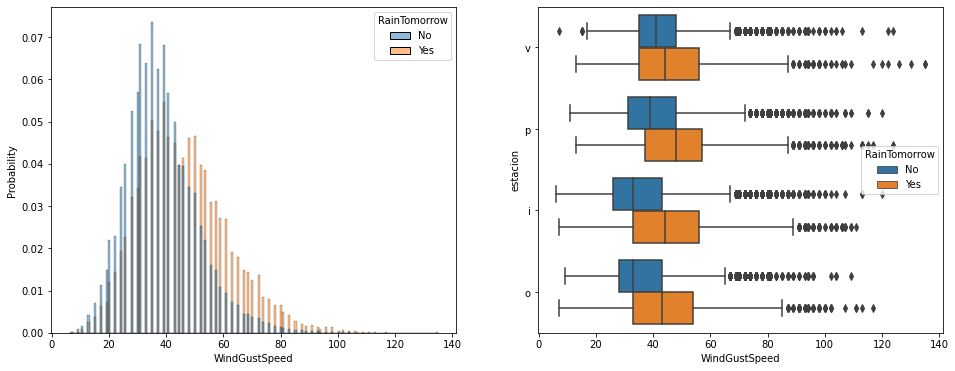

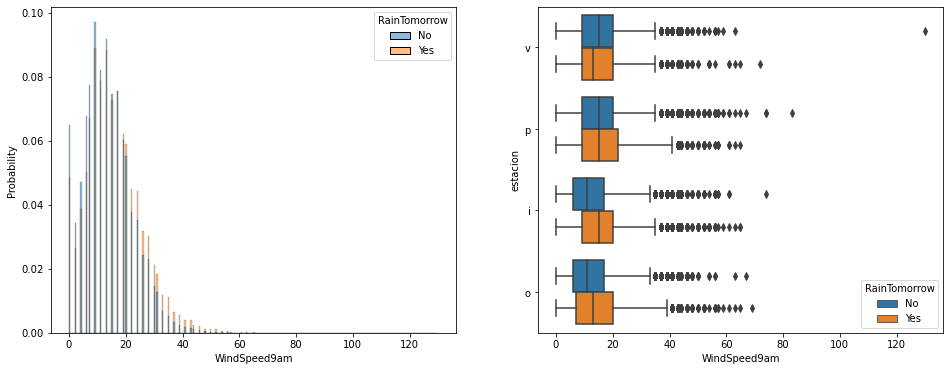

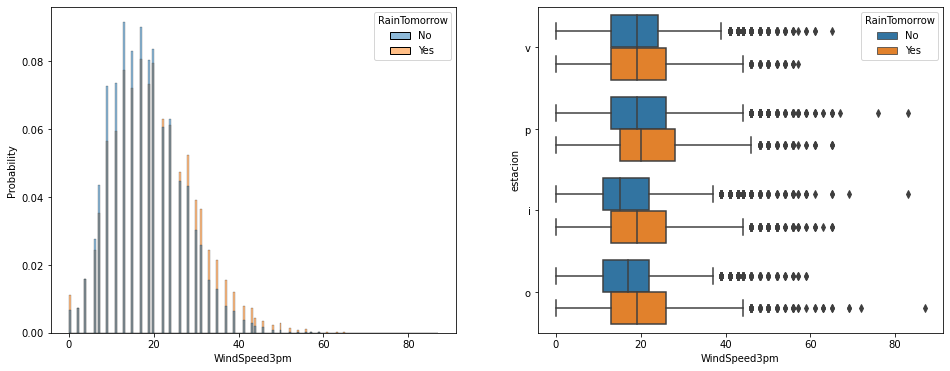

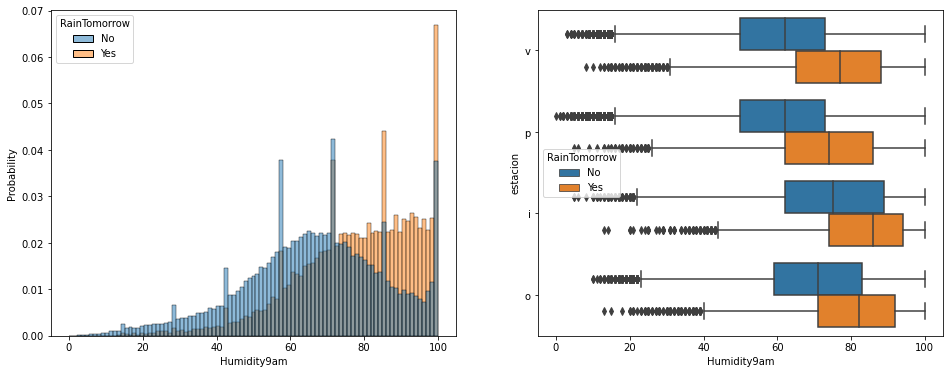

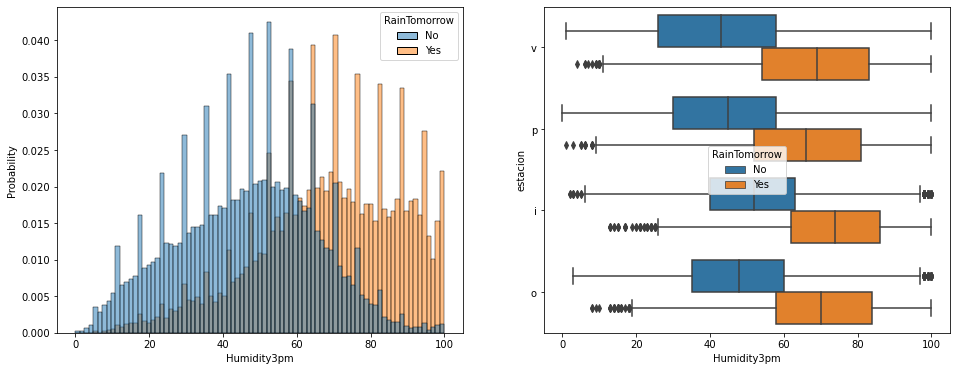

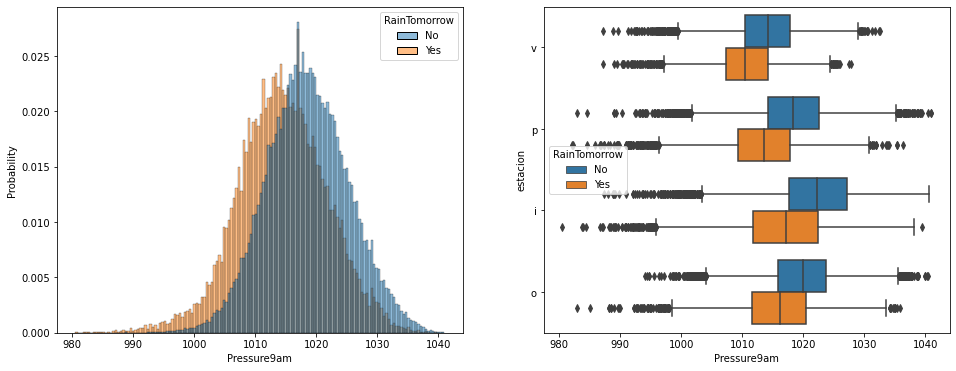

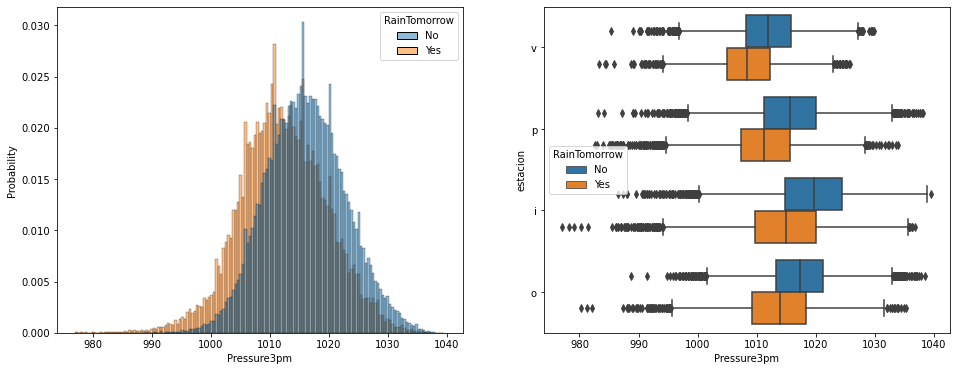

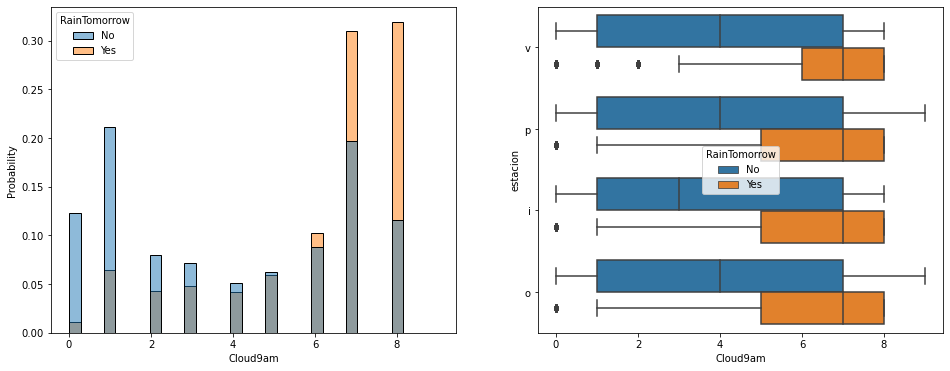

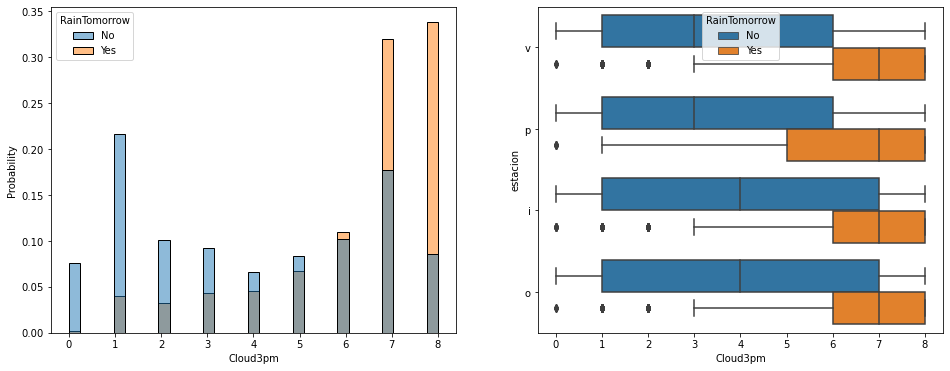

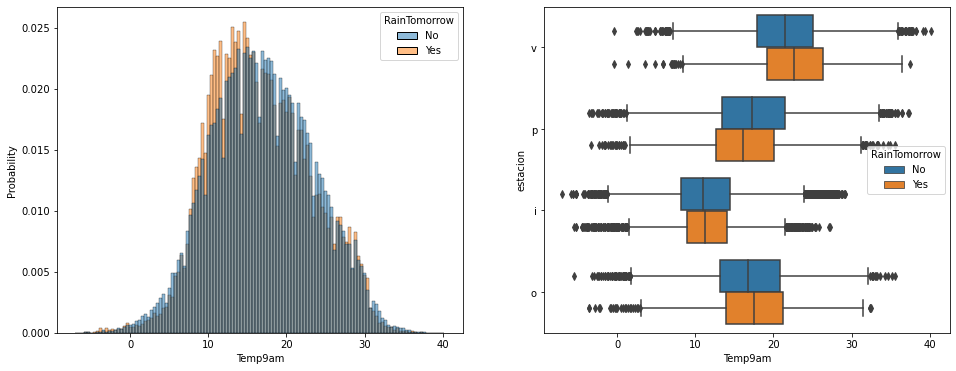

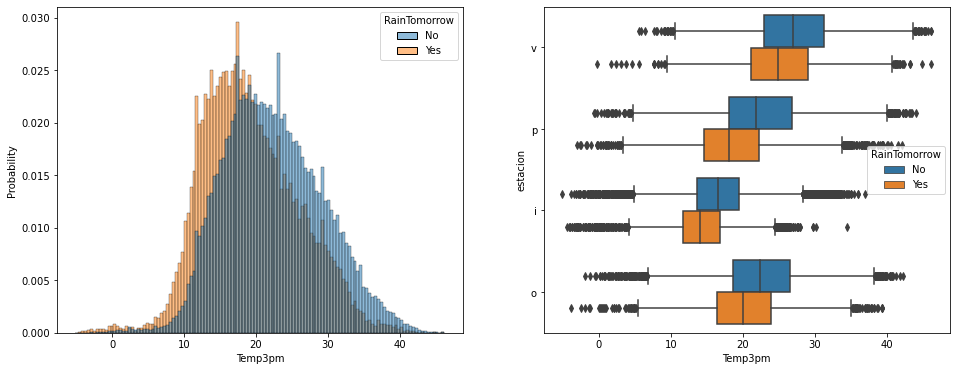

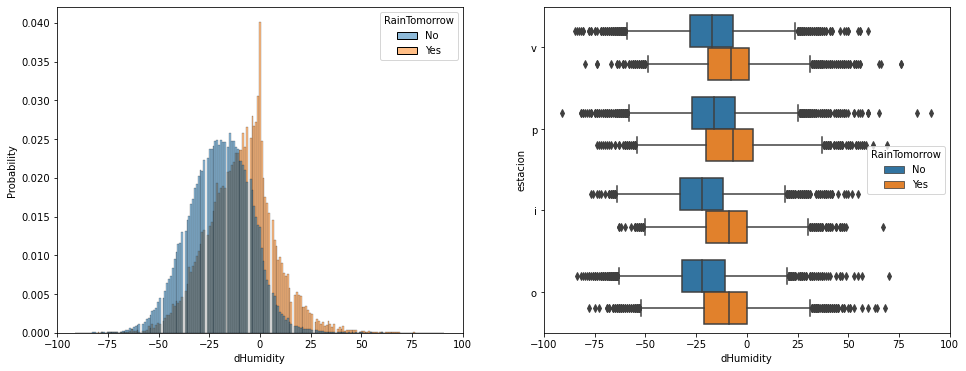

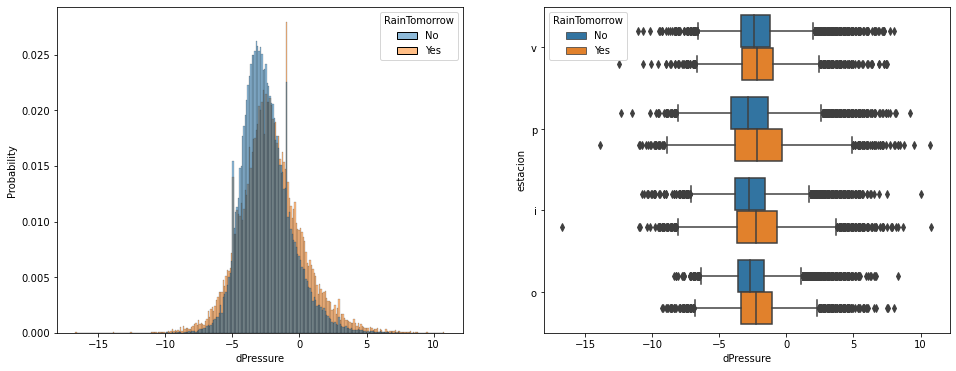

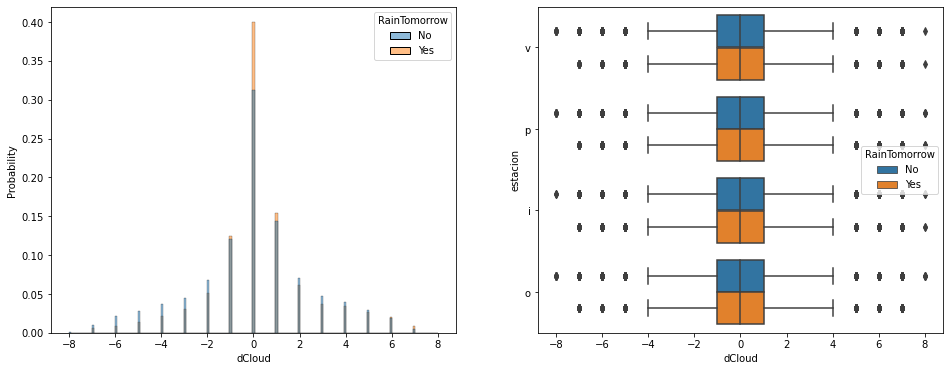

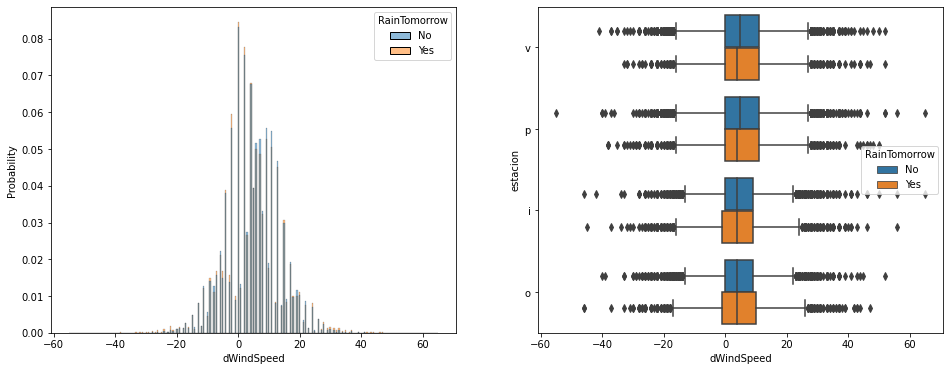

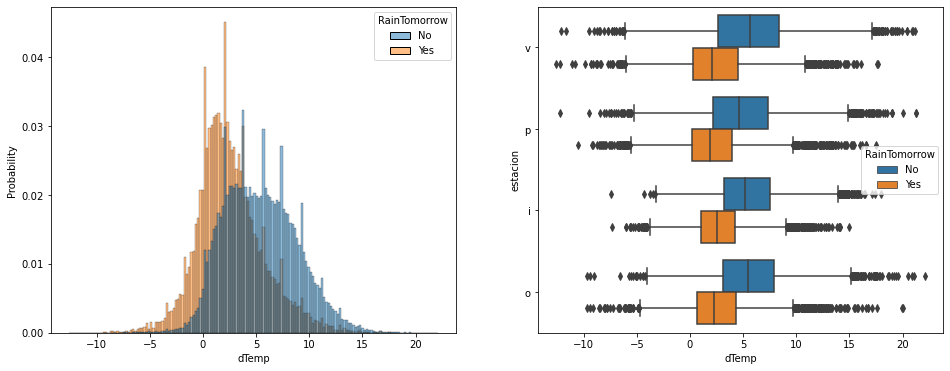

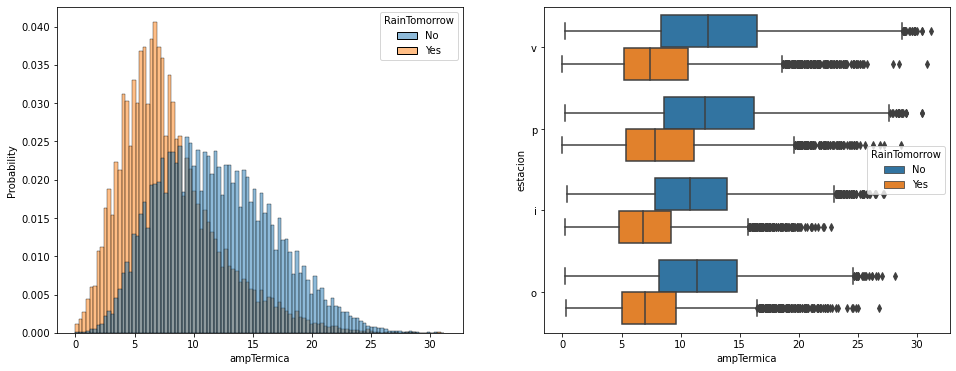

In [18]:
# Se visualizan histogramas con barras normalizadas por la variable target 
# (stat='probability', common_norm=False) de manera que las distribuciones sean comparables,
# ya que las clases están desbalanceadas y eso distorsionaría un gráfico con valores absolutos
for x in varnum:
    f, ax = plt.subplots(ncols=2,nrows=1,figsize=(16,6))
    sns.histplot(ax=ax[0],data=dftrain,x=x,hue='RainTomorrow',stat='probability',common_norm=False);
    sns.boxplot(ax=ax[1],data=dftrain,x=x,y='estacion',hue='RainTomorrow')
    plt.show();

De estas primeras visualizaciones se desprenden los siguientes puntos importantes:

* En MaxTemp se observa una mayor concentración en valores bajos para día anterior a una lluvia, puede estar asociado a la época del año --> Inve
* Rainfall requiere atención ya que su gráfico no se visualiza correctamente y al ejecutarse tarda mucho. Tiene importantes outliers superiores. 
* Sunshine para clase "Yes" tiene alta concentración en valor = 0.
* Por inspección visual, la intensidad de los vientos no parece ser marcadamente diferente, aunque las ráfagas son algo más intensas días previos a lluvias (¿Tormentas?)
* Días previos a la lluvia son marcadamente más húmedos.
* Días previos a la lluvia, parecen tener presiones algo más bajas.
* Días previos a la lluvia tienen mucha más nubosidad. 
* La temp. a las 9am no se visualiza tan diferente, pero si en temp3pm, algo más frío en días previo a lluvia
* dHumidity muestra que la humedad tiende a aumentar de la mañana a la tarde los días previos a días lluviosos.
* Previo a la lluvia, los días tienden a tener menor amplitud térmica. 
* dVientos y dNubes no ofrecen visualizaciones informativas, son variables que **se considera eliminar**.

Se agrega el describe de las variables creadas

In [144]:
dftrain[['dHumidity','dPressure','dCloud','dWindSpeed','dTemp','ampTermica']].describe()

,dHumidity,dPressure,dCloud,dWindSpeed,dTemp,ampTermica
count,110307.000000,102337.000000,64911.000000,111281.000000,111109.000000,113058.000000
mean,-17.368435,-2.395630,0.062332,4.623098,4.770967,11.047873
std,16.357743,1.966113,2.493942,8.639305,3.569522,4.960412
min,-91.000000,-16.700000,-8.000000,-55.000000,-12.600000,0.000000
25%,-28.000000,-3.700000,-1.000000,0.000000,2.100000,7.200000
50%,-17.000000,-2.600000,0.000000,4.000000,4.400000,10.500000
75%,-6.000000,-1.300000,1.000000,10.000000,7.200000,14.500000
max,91.000000,10.800000,8.000000,65.000000,22.100000,31.200000


### Correlaciones entre variables numéricas

In [145]:
dfcorrpearson = dftrain[varnum].corr(method='pearson')

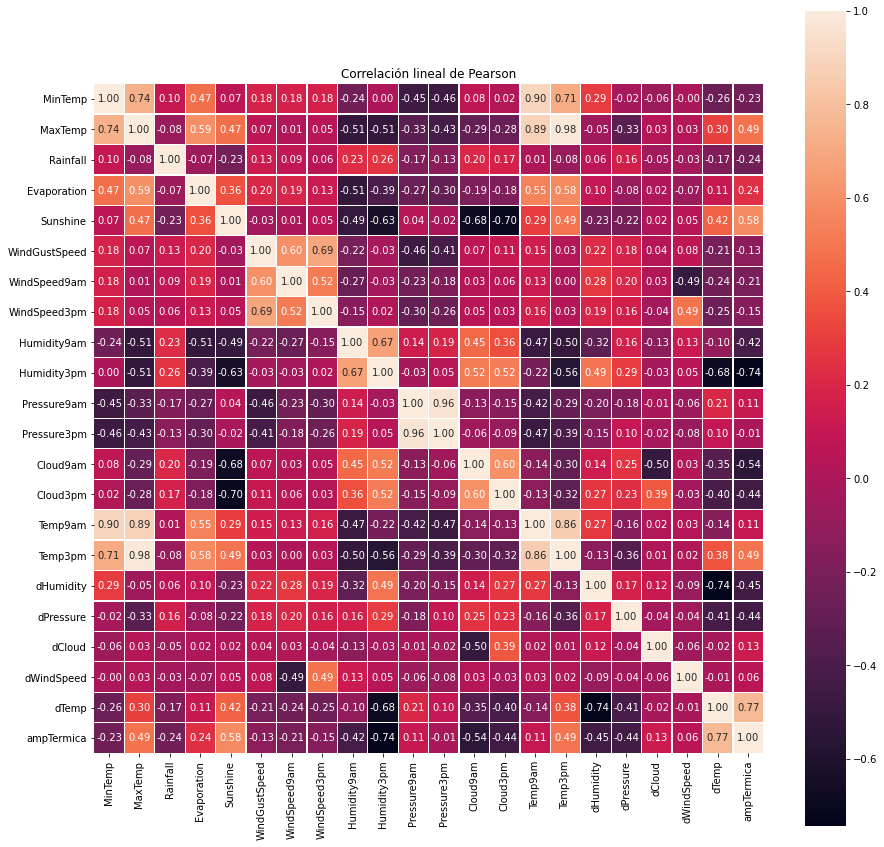

In [146]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=dfcorrpearson,annot=True,square=True,fmt='.2f',linecolor='white',linewidths=.25);
plt.title('Correlación lineal de Pearson');

In [147]:
dfcorr_spearman = dftrain[varnum].corr(method='spearman')

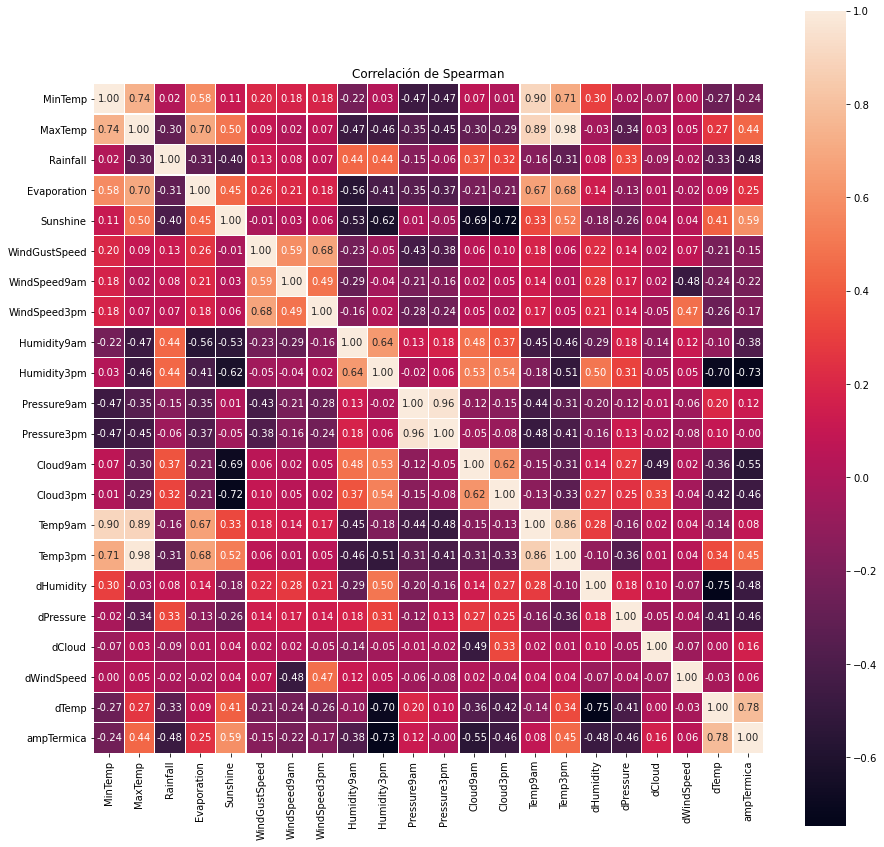

In [148]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=dfcorr_spearman,annot=True,square=True,fmt='.2f',linecolor='white',linewidths=.25);
plt.title('Correlación de Spearman');

Se agrega un filtro para mostrar únicamente aquellas correlaciones con valor absoluto >= 0.5 

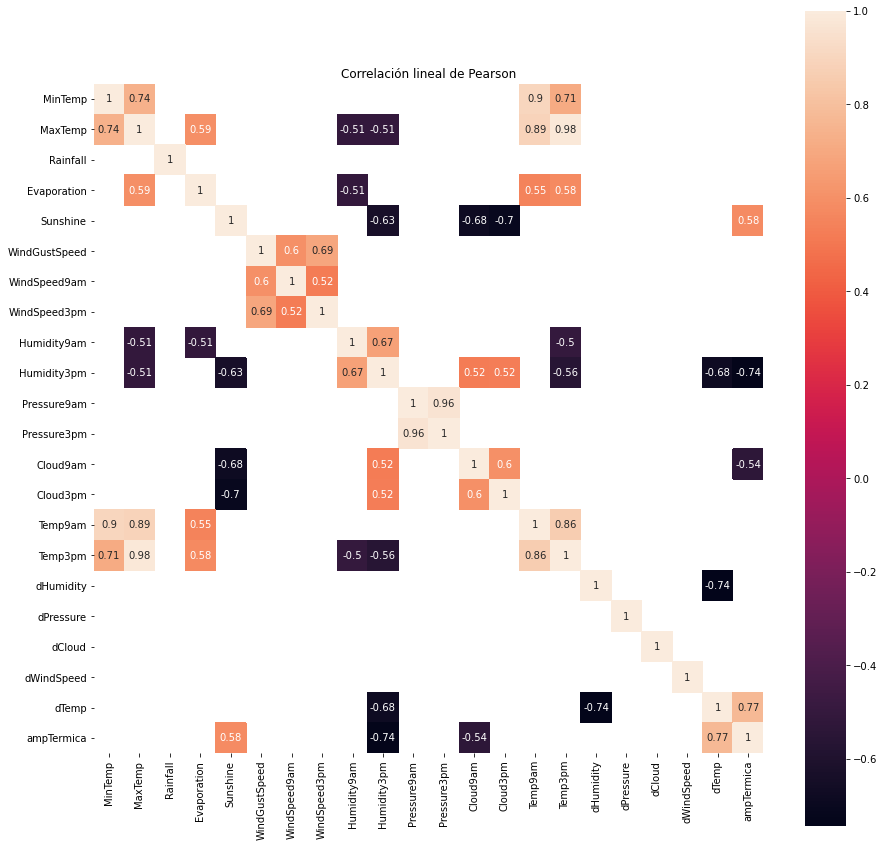

In [149]:
f, ax = plt.subplots(figsize=(15,15))

#mask
mask = np.zeros_like(dfcorrpearson)
mask = (np.abs(dfcorrpearson) < 0.5)
#plot
sns.heatmap(data=dfcorrpearson,annot=True,square=True,mask=mask);
plt.title('Correlación lineal de Pearson');

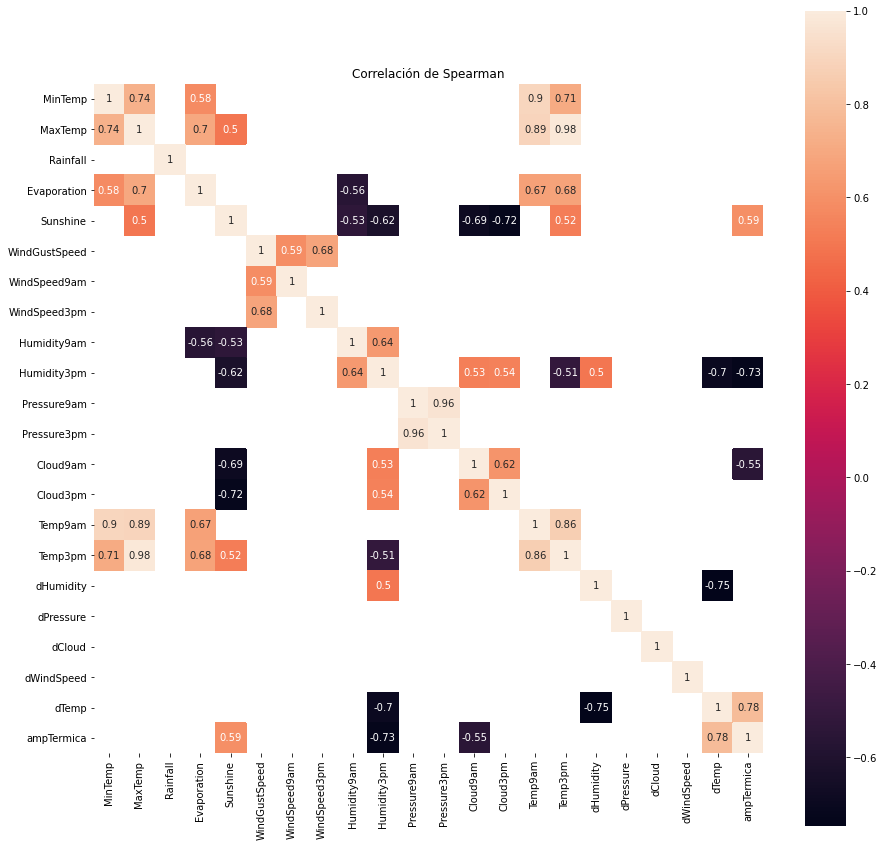

In [150]:
dfcorr_spearman = dftrain[varnum].corr(method='spearman')

f, ax = plt.subplots(figsize=(15,15))

#mask
mask = np.zeros_like(dfcorr_spearman)
mask = (np.abs(dfcorr_spearman) < 0.5)

#plot
sns.heatmap(data=dfcorr_spearman,annot=True,square=True,mask=mask);
plt.title('Correlación de Spearman');

Para analizar la matriz de correlación se prestará particular atención a aquellas correlaciones **superiores a 0.5** (en módulo). 

Se hace un análisis de las correlaciones, la cantidad de nulos y las distribuciones estudiadas en el apartado anterior para tomar mejores decisiones: 

In [19]:
alta_corr = ['MaxTemp','MinTemp','Evaporation','Pressure9am', 'Pressure3pm',
                   'Cloud9am','Cloud3pm','Sunshine', 'Temp9am','Temp3pm', 'dTemp',
             'Humidity3pm','Humidity9am','dHumidity', 'ampTermica']

In [20]:
dftrain[alta_corr].isna().sum()

MaxTemp          268
MinTemp          500
Evaporation    48647
Pressure9am    11264
Pressure3pm    11248
Cloud9am       42877
Cloud3pm       45646
Sunshine       54279
Temp9am          727
Temp3pm         2194
dTemp           2645
Humidity3pm     2902
Humidity9am     1412
dHumidity       3447
ampTermica       696
dtype: int64

In [21]:
to_drop = [#'MaxTemp', Se conserva
           'MinTemp', # Se elimina. Alta corr con max temp y más nulos
           'Evaporation', # Se elimina.  Alta corr con max temp y muchos nulos
           'Pressure9am', # Se elimina. Se conserva una de las dos mediciones de presión
           #'Pressure3pm', ya que tienen corr ~ 1 y nulos similares
           'Cloud9am', # Se elimina.  Alta corr con Cloud3pm, por el análisis de distribuciones se converva 3pm
           #'Cloud3pm', Se conserva
           #'Sunshine', Se conserva. A pesar de los nulos, se la conserva por tener una distribución muy 
                        #diferente entre lluvia/no-lluvia. Se estudiará mejor luego
           'Temp9am', #Se elimina.  Alta corr con MaxTemp
           'Temp3pm', #Se elimina.  Alta corr con MaxTemp
           'dTemp', # Se elimina.  Se conserva humidity en su lugar, para restarle peso a la variable "Temperatura" en general
           #'Humidity9am', # Se conserva por nulos similares a 3pm pero menor corr con otras variables.
           'Humidity3pm', # Se elimina. Alta corr con muchas variables. 
           #'dHumidity', Se conserva. Límite de corr con Humidity3pm
           'ampTermica', # Se elimina.  Correlación alta con muchas variables
           'WindSpeed9am', # Se eliminan por correlación con WindGustSpeed
           'WindSpeed3pm' # Se eliminan por correlación con WindGustSpeed
           #'WindGustSped' 
                ]

In [22]:
dftrain = dftrain.drop(columns=to_drop)
dftest = dftest.drop(columns=to_drop)

### Transformación de variables numéricas

#### Imputación de nulos

La estrategia de imputación de nulos será la siguiente:

* % nulos menor a 10% --> Imputar el promedio
* % nulos mayor a 10% --> Análisis profundo

In [23]:
varnum = [x for x in dftrain.select_dtypes(include=np.number).columns]

In [24]:
dftrain[varnum].isna().sum() /len(dftrain) * 100

MaxTemp           0.235596
Rainfall          0.984581
Sunshine         47.716124
WindGustSpeed     6.563286
Humidity9am       1.241275
Pressure3pm       9.888004
Cloud3pm         40.126941
target            0.000000
dHumidity         3.030223
dPressure        10.036570
dCloud           42.937391
dWindSpeed        2.173989
dtype: float64

##### Variables con alto % de nulos

Las variables Sunshine, Cloud3pm y dCloud tienen alta concentración de nulos. 

In [58]:
dftrain[['Sunshine','Cloud3pm','dCloud']].describe()

,Sunshine,Cloud3pm,dCloud
count,59475.000000,68108.000000,64911.000000
mean,7.616441,4.503597,0.062332
std,3.785047,2.721649,2.493942
min,0.000000,0.000000,-8.000000
25%,4.900000,2.000000,-1.000000
50%,8.500000,5.000000,0.000000
75%,10.600000,7.000000,1.000000
max,14.500000,8.000000,8.000000


In [71]:
(dftrain[dftrain.Sunshine.isna()==False].RainTomorrow.value_counts(),
dftrain[dftrain.Sunshine.isna() == True].RainTomorrow.value_counts())

(No     45959
 Yes    13516
 Name: RainTomorrow, dtype: int64,
 No     42293
 Yes    11986
 Name: RainTomorrow, dtype: int64)

Para la variable **Sunshine** puede verse a simple vista que la distribución de lluvia/no-lluvia con nulos y sin nulos es aproximadamente la misma. 

Por este motivo y por su alta correlación con Cloud9pm, que tiene un % significativo menor de nulos, se decide descartar esta variable para enfocarse en la otra. 

In [155]:
dftrain = dftrain.drop(columns='Sunshine')
dftest = dftest.drop(columns='Sunshine')

Para Cloud3pm realizamos el test chi2 de independencia para comparar si la distribución de eventos con lluvia cuando hay nulos o no es independiente de cuando la variable viene informada. 

In [72]:
(dftrain[dftrain.Cloud3pm.isna()==False].RainTomorrow.value_counts(),
dftrain[dftrain.Cloud3pm.isna() == True].RainTomorrow.value_counts())

(No     51825
 Yes    16283
 Name: RainTomorrow, dtype: int64,
 No     36427
 Yes     9219
 Name: RainTomorrow, dtype: int64)

In [75]:
matriz_test_cloud3pm = [
        [51825,16283], #Distribución informada
    [36427,9219]  # Distribución con nulos
        ]

In [79]:
chi2, p, dof, ex = chi2_contingency(matriz_test_cloud3pm)
print(p)

6.191788483439797e-49


Se puede rechazar la independencia, y por lo tanto se asignarán los siguiente valores a la variable:

* -1 si missing
* 0 si Cloud3pm < 6
* 1 si Cloud3pm >= 6

El valor 6 corresponde al Percentil 25 de la distribución de la variable en las estaciones Invierno, Otoño y Verano para los casos en que si llueve al día siguiente. Por inspección visual en los gráficos de arriba, puede verse que es una buena heurística para separar los registros con y sin evento, respectivamente. 

Pasa entonces a formar parte de las variables categoricas ( se imputan valores en string por este motivo ) 

In [25]:
dftrain.loc[:,['Cloud3pm_cat']] = dftrain.Cloud3pm.fillna(-1).apply(lambda x: '-1' if (x == -1) else '0' if x < 6 else '1')
dftest.loc[:,['Cloud3pm_cat']] = dftest.Cloud3pm.fillna(-1).apply(lambda x: '-1' if (x == -1) else '0' if x < 6 else '1')

In [26]:
dftrain = dftrain.drop(columns='Cloud3pm')
dftest = dftest.drop(columns='Cloud3pm')

In [157]:
dftrain.Cloud3pm_cat.value_counts()

-1    45646
0     36643
1     31465
Name: Cloud3pm_cat, dtype: int64

Al mismo tiempo, dado el alto porcentaje de nulos de dCloud y su correlación relativamente alta (~0.33 con Coud3pm) se considera preferible descartar también esta variable y conservar únicamente la anterior.

In [27]:
dftrain = dftrain.drop(columns='dCloud')
dftest = dftest.drop(columns='dCloud')

##### Variables con bajo % de nulos

In [30]:
imputar_promedio = ['MaxTemp',
                    'Rainfall',     
                    'WindGustSpeed',
                    'Humidity9am',
                    'Pressure3pm',
                    'dHumidity', 
                    'dPressure', 
                    'dWindSpeed']

In [31]:
for col in imputar_promedio:
    dftrain[col] = dftrain[col].fillna(dftrain[col].mean())
    # En test le asignamos la media del train para no hacer data-leakage
    dftest[col] = dftest[col].fillna(dftrain[col].mean())

#### Centrado y re-escalado de variables numéricas

In [32]:
varnum = [x for x in dftrain.select_dtypes(include=np.number).columns]

In [33]:
varnum.remove('target')

In [35]:
transformer = RobustScaler().fit(dftrain[varnum])

In [36]:
dftrain[varnum] = transformer.transform(dftrain[varnum])
dftest[varnum] = transformer.transform(dftest[varnum])

In [181]:
# checkpoint de datasets para evitar reprocesado
dftrain.to_csv('dftrain.csv',sep=';')
dftest.to_csv('dftest.csv',sep=';')

### Variables categóricas

In [37]:
varcat = [x for x in dftrain.select_dtypes('O')]

In [38]:
# Se elimina RainTomrrow porque es la variable target
varcat.remove('RainTomorrow')

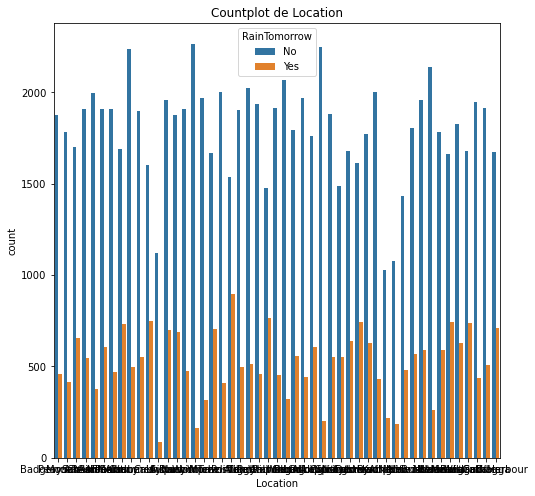

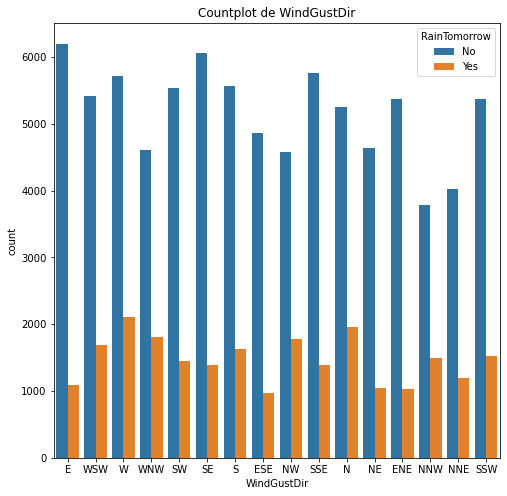

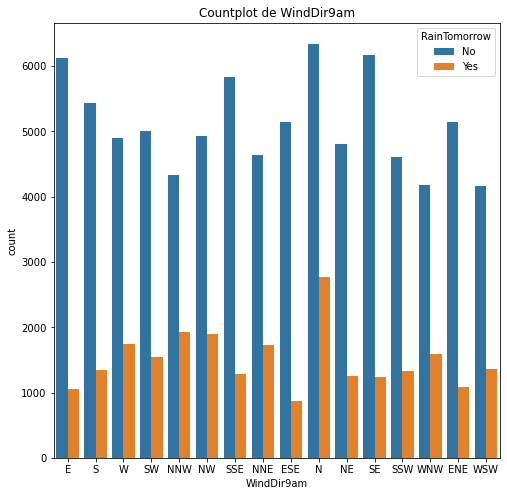

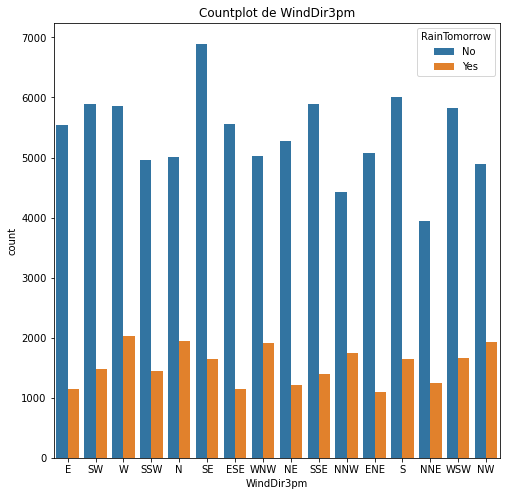

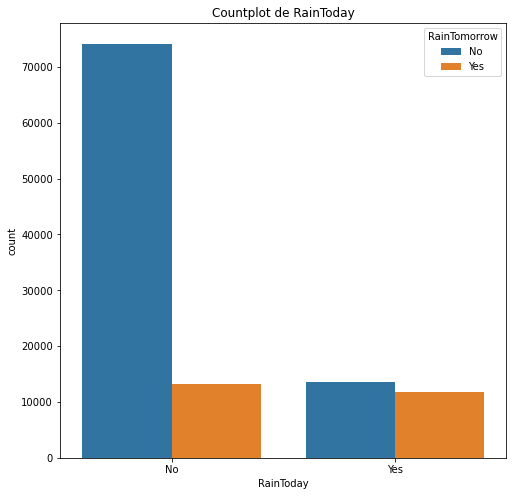

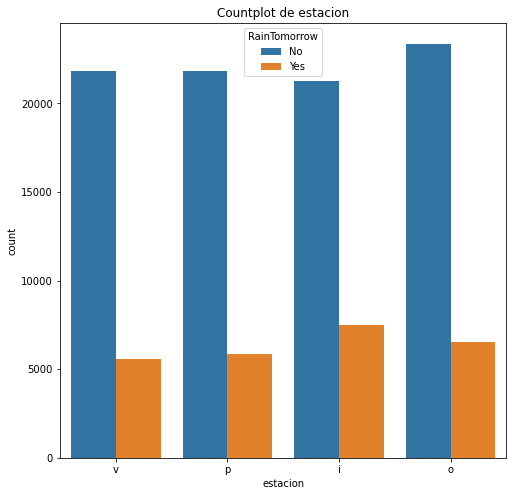

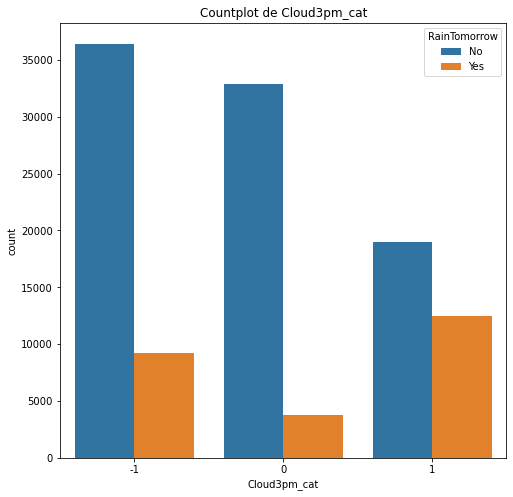

In [206]:
for var in varcat:
    f, ax = plt.subplots(ncols=1,nrows=1,figsize=(8,8))
    sns.countplot(ax=ax,data=dftrain, x=var, hue='RainTomorrow');
    plt.title('Countplot de {}'.format(var))
    plt.show();

### Location

Dada la alta cardinalidad de la variable se opta por buscar la manera de agrupar las ciudades de manera que se tenga una nueva variable que condense una información fácilmente explotable por los modelos a la hora den entrenar.

In [39]:
location_event = dftrain.groupby(['Location'],as_index=False).agg(event=('target','sum'),total_obs=('target','count'))

In [40]:
location_event['pct_rain'] = location_event.event / location_event.total_obs

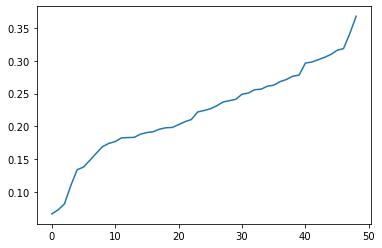

In [234]:
plt.plot(range(len(location_event)), location_event.pct_rain.sort_values())

Se construirán 4 grupos:
* 1 : pct_rain < 10%
* 2 : pct_rain in [10%, 23%]
* 3 : pct_rain in [23%, 28%]
* 4 : pct_rain > 28%

In [41]:
location_event['grupo_ciudad'] = location_event.pct_rain.apply(lambda x: 4 if x > 0.28 else
                                                                    3 if x >= 0.23 else
                                                                    2 if x >= 0.10 else
                                                                    1)

In [42]:
mapper = location_event[['Location','grupo_ciudad']]

In [43]:
dftrain = pd.merge(left=dftrain,right=mapper, how='left', on='Location')

In [44]:
dftest = pd.merge(left=dftest,right=mapper, how='left', on='Location')

In [45]:
dftrain.drop(columns='Location',inplace=True)
dftest.drop(columns='Location',inplace=True)

In [261]:
dftrain.to_csv('dftrain.csv',sep=';')
dftest.to_csv('dftest.csv',sep=';')

#### WindDir 9am , 3pm y WindGust

Para disminuir la cardinalidad de estas variables, agrupamos simplemente en Norte, Sur, Este y Oeste.

In [46]:
dftrain.WindDir3pm.fillna('nan',inplace=True)
dftest.WindDir3pm.fillna('nan',inplace=True)

dftrain.WindDir9am.fillna('nan',inplace=True)
dftest.WindDir9am.fillna('nan',inplace=True)

dftrain.WindGustDir.fillna('nan',inplace=True)
dftest.WindGustDir.fillna('nan',inplace=True)

In [47]:
dftrain['WindDir3pm_agrup'] = dftrain.WindDir3pm.apply(lambda x: str(x)[0])
dftest['WindDir3pm_agrup'] = dftest.WindDir3pm.apply(lambda x: str(x)[0])

dftrain['WindDir9am_agrup'] = dftrain.WindDir9am.apply(lambda x: str(x)[0])
dftest['WindDir9am_agrup'] = dftest.WindDir9am.apply(lambda x: str(x)[0])

dftrain['WindGustDir_agrup'] = dftrain.WindGustDir.apply(lambda x: str(x)[0])
dftest['WindGustDir_agrup'] = dftest.WindGustDir.apply(lambda x: str(x)[0])

In [48]:
dftrain.drop(columns=['WindDir9am','WindDir3pm','WindGustDir'],inplace=True)
dftest.drop(columns=['WindDir9am','WindDir3pm','WindGustDir'],inplace=True)

In [49]:
dftrain.to_csv('dftrain.csv',sep=';')
dftest.to_csv('dftest.csv',sep=';')

### OneHotEncoding

Realizadas estas transformaciones, se realizará un OHE de las variables categóricas.

In [50]:
columns_to_ohe = ['WindDir3pm_agrup','WindDir9am_agrup','WindGustDir_agrup','grupo_ciudad','Cloud3pm_cat','estacion','RainToday']

In [89]:
dftrain = pd.get_dummies(data=dftrain,columns=columns_to_ohe,drop_first=True)
dftest = pd.get_dummies(data=dftest,columns=columns_to_ohe,drop_first=True)

In [90]:
dftrain.to_csv('dftrain.csv',sep=';')
dftest.to_csv('dftest.csv',sep=';')

# 4. Entrenamiento de modelos



In [2]:
import pandas as pd

In [3]:
dftrain = pd.read_csv('dftrain.csv',sep=';')
dftest = pd.read_csv('dftest.csv',sep=';')

In [4]:
train_columns = ['MaxTemp', 'Rainfall', 'WindGustSpeed',
       'Humidity9am', 'Pressure3pm', 'dHumidity', 'dPressure',
       'dWindSpeed', 'WindDir3pm_agrup_N', 'WindDir3pm_agrup_S',
       'WindDir3pm_agrup_W', 'WindDir3pm_agrup_n', 'WindDir9am_agrup_N',
       'WindDir9am_agrup_S', 'WindDir9am_agrup_W', 'WindDir9am_agrup_n',
       'WindGustDir_agrup_N', 'WindGustDir_agrup_S', 'WindGustDir_agrup_W',
       'WindGustDir_agrup_n', 'grupo_ciudad_2', 'grupo_ciudad_3',
       'grupo_ciudad_4', 'Cloud3pm_cat_0', 'Cloud3pm_cat_1', 'estacion_o',
       'estacion_p', 'estacion_v', 'RainToday_Yes']

In [5]:
ytrain = dftrain['target'].copy()
xtrain = dftrain[train_columns].copy()

ytest = dftest['target'].copy()
xtest = dftest[train_columns].copy()

## Modelos

In [11]:
names = ["Nearest Neighbors 3",
         "Nearest Neighbors 5",
         "Nearest Neighbors 7",
         "LogisticRegression",
         "Gaussian Process",
         "Decision Tree max_depth 5",
         "Decision Tree max_depth 10",
         "Random Forest max_depth 5",
         "Random Forest max_depth 10",
         "AdaBoost",
         "Naive Bayes",
         "QDA"]

In [13]:
classifiers = [
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    KNeighborsClassifier(7),
    LogisticRegression(penalty='l2',class_weight='balanced',max_iter=25000,solver='saga'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=5, n_estimators=50, max_features=10),
    RandomForestClassifier(max_depth=10, n_estimators=50, max_features=10),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [14]:
classifier_dic = {x:y for (x,y) in zip(names,classifiers)}

In [15]:
metrics = [balanced_accuracy_score,f1_score,roc_auc_score,confusion_matrix]

In [16]:
def train_schedule(xtrain,ytrain,xtest,ytest,classifier):
    print('{}'.format(classifier[0]))
    try:
        classifier[1].fit(xtrain,ytrain)
        yhat = classifier[1].predict(xtest)
        for metric in metrics:
            print(metric.__name__)
            try:
                print(round(metric(ytest,yhat),3))
            except:
                #Confusion Matrix no se le puede aplicar round
                print(metric(ytest,yhat))
    except:
        print('Error al entrenar')
    print('\n')
    print('*'*50)
    print('\n')

In [17]:
for classifier in classifier_dic.items():
    train_schedule(xtrain,ytrain,xtest,ytest,classifier)

Nearest Neighbors 3
balanced_accuracy_score
0.696
f1_score
0.539
roc_auc_score
0.696
confusion_matrix
[[20159  1905]
 [ 3321  3054]]


**************************************************


Nearest Neighbors 5
balanced_accuracy_score
0.698
f1_score
0.546
roc_auc_score
0.698
confusion_matrix
[[20525  1539]
 [ 3403  2972]]


**************************************************


Nearest Neighbors 7
balanced_accuracy_score
0.697
f1_score
0.546
roc_auc_score
0.697
confusion_matrix
[[20686  1378]
 [ 3467  2908]]


**************************************************


LogisticRegression
balanced_accuracy_score
0.776
f1_score
0.612
roc_auc_score
0.776
confusion_matrix
[[17463  4601]
 [ 1530  4845]]


**************************************************


Gaussian Process
Error al entrenar


**************************************************


Decision Tree max_depth 5
balanced_accuracy_score
0.669
f1_score
0.498
roc_auc_score
0.669
confusion_matrix
[[21052  1012]
 [ 3927  2448]]


******************

El modelo que mejores resultados generó fue la LogisticRegression, motivo por el cual vamos a realizar una exploración algo más profunda del mismo:

In [6]:
LR = LogisticRegression(solver='saga', max_iter=25000, random_state=12, class_weight='balanced')
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1'],
                        tol=[1e-3,1e-4])


In [7]:
clf = RandomizedSearchCV(LR, distributions, 
                         random_state=12,
                         n_iter=10,
                         scoring='f1',
                        verbose=3)

In [8]:
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=0.6166513695186895, penalty=l2, tol=0.0001; total time=  43.2s
[CV 2/5] END ...C=0.6166513695186895, penalty=l2, tol=0.0001; total time=  38.4s
[CV 3/5] END ...C=0.6166513695186895, penalty=l2, tol=0.0001; total time=  48.0s
[CV 4/5] END ...C=0.6166513695186895, penalty=l2, tol=0.0001; total time=  30.1s
[CV 5/5] END ...C=0.6166513695186895, penalty=l2, tol=0.0001; total time=  42.4s
[CV 1/5] END ...C=1.0532600607405387, penalty=l1, tol=0.0001; total time=  45.7s
[CV 2/5] END ...C=1.0532600607405387, penalty=l1, tol=0.0001; total time=  41.5s
[CV 3/5] END ...C=1.0532600607405387, penalty=l1, tol=0.0001; total time=  53.0s
[CV 4/5] END ...C=1.0532600607405387, penalty=l1, tol=0.0001; total time=  33.2s
[CV 5/5] END ...C=1.0532600607405387, penalty=l1, tol=0.0001; total time=  47.4s
[CV 1/5] END .C=0.058299849941678694, penalty=l2, tol=0.0001; total time=  35.8s
[CV 2/5] END .C=0.058299849941678694, penalty=l2

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=25000, random_state=12,
                                                solver='saga'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd5a8cb9c40>,
                                        'penalty': ['l2', 'l1'],
                                        'tol': [0.001, 0.0001]},
                   random_state=12, scoring='f1', verbose=3)

In [9]:
best_lr = clf.best_estimator_

In [10]:
best_lr

LogisticRegression(C=1.1353134118317834, class_weight='balanced',
                   max_iter=25000, random_state=12, solver='saga', tol=0.001)

In [11]:
best_lr.fit(xtrain,ytrain)

LogisticRegression(C=1.1353134118317834, class_weight='balanced',
                   max_iter=25000, random_state=12, solver='saga', tol=0.001)

In [12]:
yhat = best_lr.predict(xtest)

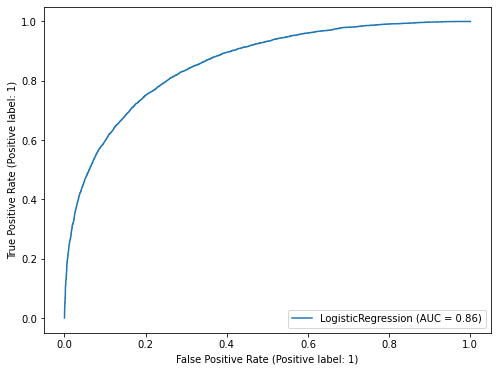

In [13]:
f,ax = plt.subplots(figsize=(8,6))
plot_roc_curve(best_lr, xtest,ytest,ax=ax);

In [14]:
balanced_accuracy_score(ytest,yhat),f1_score(ytest,yhat)

(0.7750761883433577, 0.611261744120058)

In [15]:
confusion_matrix(ytest,yhat)

array([[17427,  4637],
       [ 1528,  4847]])


### 5. Evaluación de resultados y conclusiones

Tras hacer pruebas con diferentes modelos de clasificación con parámetros sugeridos por sklearn, el mejor resultado lo obtiene una regresión logística, aunque otros modelos no estuvieron tan lejos de igualar la performance.
Para continuar, se hace una búsqueda aleatoria de hiperparámetros para la regresión logística, intentando encontrar aquella combinación que mejore los resultados obtenidos en primera instancia. Se utiliza _RandomizedSearchCV_ y se obtiene finalmente una Regresión Logíosica que alcanza una AUC de 0.86, balanced accuracy de 77% y F1_Score de 0.611. 
Comparando los resultados obtenidos tras la búsqueda de hiperparámetros, puede observarse que la mejora se da en la AUC, ya que las otras métricas no han mejorado significativamente. 


### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.
